In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pickle
import joblib
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dropout,Dense,Input
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

/kaggle/input/birdfrog-eda/test_labels.pkl
/kaggle/input/birdfrog-eda/train_features.pkl
/kaggle/input/birdfrog-eda/filename-noise.wav
/kaggle/input/birdfrog-eda/filename.wav
/kaggle/input/birdfrog-eda/__results__.html
/kaggle/input/birdfrog-eda/train_labels.pkl
/kaggle/input/birdfrog-eda/test_features.pkl
/kaggle/input/birdfrog-eda/train_noOS_labels.pkl
/kaggle/input/birdfrog-eda/train_noOS_features.pkl
/kaggle/input/birdfrog-eda/__notebook__.ipynb
/kaggle/input/birdfrog-eda/__output__.json
/kaggle/input/birdfrog-eda/custom.css
/kaggle/input/birdfrog-eda/__results___files/__results___15_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___10_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___24_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___36_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___21_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___46_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___30_0.png
/ka

In [2]:
X_train = joblib.load('/kaggle/input/birdfrog-eda/train_features.pkl')
X_test = joblib.load('/kaggle/input/birdfrog-eda/test_features.pkl')
print(X_train.shape,X_test.shape)

(1226, 128, 1000, 3) (304, 128, 1000, 3)


In [3]:
y_train = np.array(joblib.load('/kaggle/input/birdfrog-eda/train_labels.pkl'))
y_test = np.array(joblib.load('/kaggle/input/birdfrog-eda/test_labels.pkl'))
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape,X_val.shape, y_val.shape)

(919, 128, 1000, 3) (919,) (304, 128, 1000, 3) (304,) (307, 128, 1000, 3) (307,)


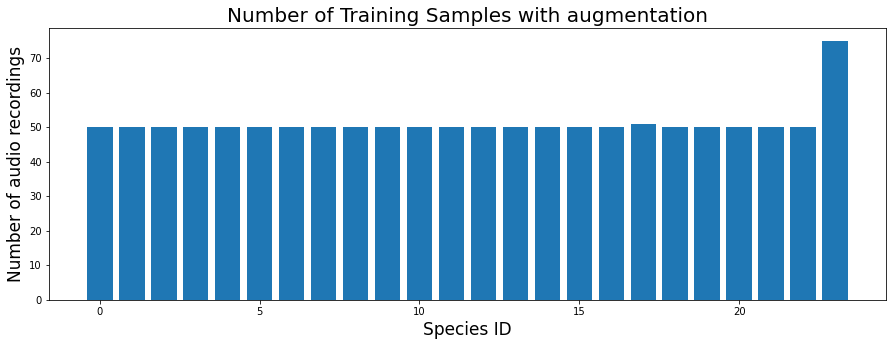

In [4]:
unique, counts = np.unique(np.concatenate((y_train,y_val)),return_counts=True)
values=dict(zip(unique,counts))
fig, ax = plt.subplots(figsize=(15,5))
barlist=plt.bar(values.keys(),values.values(), label='Minority samples')
plt.xlabel('Species ID', fontsize=17)
plt.ylabel('Number of audio recordings', fontsize=17)
plt.title('Number of Training Samples with augmentation', fontsize=20)
plt.show()

# ANN performs poorly and fails to learn after a few epochs

In [5]:
ANNmodel = Sequential()
ANNmodel.add(layers.Dense(256, activation='relu', input_shape=(X_train.reshape(919,128*1000*3).shape[1],)))
ANNmodel.add(layers.Dense(128, activation='relu'))
ANNmodel.add(layers.Dropout(0.2))
ANNmodel.add(layers.Dense(128, activation='relu'))
ANNmodel.add(layers.Dense(64, activation='relu'))
ANNmodel.add(layers.Dropout(0.2))
ANNmodel.add(layers.Dense(64, activation='relu'))
ANNmodel.add(layers.Dense(32, activation='relu'))
ANNmodel.add(layers.Dense(16, activation='relu'))
ANNmodel.add(layers.Dropout(0.2))
ANNmodel.add(layers.Dense(24, activation='softmax'))
ANNmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
ANNmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               98304256  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4

In [6]:
ANNclassifier = ANNmodel.fit(X_train.reshape(919,128*1000*3),
                    y_train,
                    epochs=30, validation_data=(X_val.reshape(307,128*1000*3), 
                    y_val),
                    batch_size=919)

Epoch 1/30
1/1 [==============================] - 8s 8s/step - loss: 4.4416 - accuracy: 0.0403 - val_loss: 22.7999 - val_accuracy: 0.0358
Epoch 2/30
1/1 [==============================] - 4s 4s/step - loss: 32.3095 - accuracy: 0.0522 - val_loss: 13.1824 - val_accuracy: 0.0293
Epoch 3/30
1/1 [==============================] - 5s 5s/step - loss: 20.8580 - accuracy: 0.0566 - val_loss: 11.2498 - val_accuracy: 0.1075
Epoch 4/30
1/1 [==============================] - 5s 5s/step - loss: 18.2914 - accuracy: 0.0653 - val_loss: 5.1111 - val_accuracy: 0.0619
Epoch 5/30
1/1 [==============================] - 5s 5s/step - loss: 12.5650 - accuracy: 0.0588 - val_loss: 5.2688 - val_accuracy: 0.0586
Epoch 6/30
1/1 [==============================] - 5s 5s/step - loss: 10.3389 - accuracy: 0.0424 - val_loss: 4.1815 - val_accuracy: 0.0456
Epoch 7/30
1/1 [==============================] - 5s 5s/step - loss: 7.9501 - accuracy: 0.0598 - val_loss: 3.5592 - val_accuracy: 0.0717
Epoch 8/30
1/1 [=================

In [7]:
TrainLoss, Trainacc = ANNmodel.evaluate(X_train.reshape(919,128*3000),y_train)
TestLoss, Testacc = ANNmodel.evaluate(X_test.reshape(304,128*3000), y_test)
y_pred=ANNmodel.predict(X_test.reshape(304,128*3000))
print('TrainLoss: %f, Train accuracy %f, TestLoss: %f, Test Accuracy: %f ' %(TrainLoss,Trainacc,TestLoss,Testacc))
print('Confusion_matrix: ',tf.math.confusion_matrix(y_test, np.argmax(y_pred,axis=1)))

10/10 [==============================] - 1s 78ms/step - loss: 3.0056 - accuracy: 0.1151
TrainLoss: 3.007392, Train accuracy 0.084875, TestLoss: 3.005581, Test Accuracy: 0.115132 
Confusion_matrix:  tf.Tensor(
[[ 0  5  0  2  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  1  2  0  0]
 [ 0  2  1  0  0  0  0  0  8  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0]
 [ 0  0  0  4  0  0  0  0  1  0  0  0  0  0  1  3  0  0  0  0  0  0  0  0]
 [ 0  4  0  5  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  1  0  0]
 [ 0  0  0  2  0  0  0  0  6  0  0  0  0  0  0  2  0  0  0  0  3  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  1  0  0  0  0  0  0  4  0  0  0  3  0  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0 

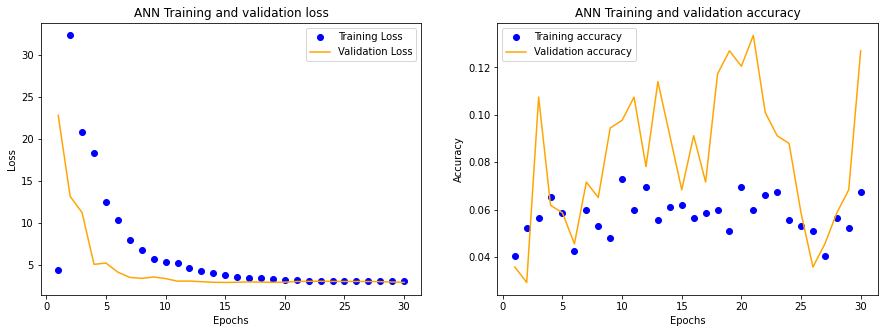

In [8]:
history_dict=ANNclassifier.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,31)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('ANN Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('ANN Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()